In [71]:

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

tyear=3.15551e+07
au=1.5e11
msun=2e30
mearth=5.97e24
grav=6.67e-11

from astropy.io import ascii

import seaborn as sns
sns.set(font_scale = 2)
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 3})

import re

## The directory where the files to be plotted are stored
dir1=['/Users/amy/Documents/backup_datadir/projects/collevol/origin_try/abelt_1au_ecc_0.1_dmax_5e6/'] 



color_all=['tab:blue','tab:olive', 'tab:orange', 'tab:red', 'tab:purple', 'tab:green']

#########


In [72]:
def read_inparam(dir1):
    f = open(dir1+ "inparam.in", "r")

    f.readline() #restart
    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta_t=float(delta_t_all[1])

    line_split=f.readline() #rin
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rin=float(delta_t_all[1])

   
    line_split=f.readline() #rout

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rout=float(delta_t_all[1])

    
    
    line_split=f.readline() #imax

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    imax=float(delta_t_all[1])


    line_split=f.readline() #ecc

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    ecc=float(delta_t_all[1])
    line_split=f.readline() #vrel

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    vrel=float(delta_t_all[1])

    
     # delta

    line_split=f.readline()  # 
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta=float(delta_t_all[1])

    line_split=f.readline()  # alpha
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    alpha=float(delta_t_all[1])


    q=(2+alpha)/3

    print("Q", q)
        
    line_split=f.readline() # mtot0
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    mtot0=float(delta_t_all[1])

   

    line_split=f.readline()  # rho_s
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_s=float(delta_t_all[1])



    
    line_split=f.readline() # dmax
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dmax=float(delta_t_all[1])



    line_split=f.readline() # dbl
    

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dbl=float(delta_t_all[1])


    print(f.readline()) # ntime

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    outputinterval=float(delta_t_all[1])


    print(f.readline()) # agrain


    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    fv0=float(delta_t_all[1])


    print(f.readline()) # 

    f.close()



    
    #; find the number of bins! 

    diam_scrap=dmax
    i=0
    while(diam_scrap > dbl) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    nbin=i-1


    print ( 'nbin', nbin)

    
        
    diam_scrap=dmax
    i=0
    while(diam_scrap > 10) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    norigin=i-1
    print ( 'norigin', norigin)
    
    
    mass_i=np.zeros(nbin)
    diam_i=np.zeros(nbin)


    diam_i[0]=dmax
    mass_i[0]=rho_s*diam_i[0]**3./6.
    for i in range(1, nbin-1):
        mass_i[i]=mass_i[i-1]*(1-delta)
    diam_i=(mass_i*6./rho_s)**(1./3.)

    ntime=100000
    r= au*(rin + rout)/2.
    dr=r/2.


    return diam_i, nbin, norigin, delta_t, ecc,mtot0, outputinterval, r, q, rho_s, imax, dr, dbl, dmax




In [73]:
def calc_qdstar(d):
    a=0.3
    Qa=620
    Qb=5.6e-3
    b=1.5
    qdstar=Qa*d**(-a) + Qb*d**(b)
    return qdstar;

In [74]:
## Calculate the collision timescales   
    

def calc_tc(diam, mtot, r, q, ecc):
    tyear=3.15551e+07
    au=1.5e11
    msun=2e30
    mearth=5.97e24
    grav=6.67e-11
    vrel=ecc*((grav*msun)/(r))**0.5
    print('vrel', vrel, ecc, 'mtot', mtot)
    x_c=(2*calc_qdstar(diam)/vrel**2)**(1./3.)
    G=0.2*x_c**(-5/2.)
    tper= 2*np.pi*(r**3./(grav*msun))**0.5
    sigma_tot_fcc = (3*mtot*mearth*G/(4*rho_s*diam))* ((6-3*q)/(3*q-5))
    tc_amy =(tper/tyear) *(r*dr/sigma_tot_fcc )* 2*imax/f_e_I  #### years
    return tc_amy;


def const_tc(mtot, r, q, ecc):
    tyear=3.15551e+07
    au=1.5e11
    msun=2e30
    mearth=5.97e24
    grav=6.67e-11
    Qb=5.6e-3
    b=1.5
    vrel=ecc*((grav*msun)/(r))**0.5
    print('vrel', vrel, ecc, 'mtot', mtot)
    x_c=(2*Qb/vrel**2)**(1./3.)
    G=0.2*x_c**(-5/2.)
    tper= 2*np.pi*(r**3./(grav*msun))**0.5
    sigma_tot_fcc = (3*mtot*mearth*G/(4*rho_s))* ((6-3*q)/(3*q-5))
    const =(tper/tyear) *(r*dr/sigma_tot_fcc )* 2*imax/f_e_I  #### years
    return const;


def d_eq(time, mtot, r, q, ecc):
    b=1.5
    d_eq= (time/const_tc(mtot, r, q, ecc))**(1./(1+5*b/6.))
    print('time/tc', 'b',time/const_tc(mtot, r, q, ecc),const_tc(mtot, r, q, ecc), time, b)
    return d_eq;


In [75]:
def get_rate (itime_max_float, file):

         #finds the collision rate as a function of diamter/mass at a particular epoch - given by itime_max_float
        # the file should be /rate_r.dat or /rate_c.dat 

        f = open(file, "r")

        f.readline()


         #print(itime_max_float, it)
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
              #print(timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))

    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
        

In [76]:
## find the mass in each diameter bin at each epoch from the file collouts.dat


def get_mass (itime_max_float, file, vol):

         #print(itime_max_float, file, vol)
        f = open(file, "r")

        if (vol==0):
            f.readline() # first line of constants
        if (vol==1):
            f.readline()


         #print(itime_max_float, it)
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
             #print('ee',timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[3])
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))
            if (vol==0):
                f.readline() #  Gas 
                f.readline() # Mdot
            #print(mass)
    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[3])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
        



In [77]:
## define how frequently to plot the ouput = default is plot_define_timestep=1. If plot_define_timestep=0, then you can plot four epochs evenly spaced during the simulation

diam_i, nbin, norigin, delta_t, ecc, mtot, outputinterval, r, q, rho_s, imax, dr, dbl, dmax= read_inparam(dir1[0])




plot_define_timestep=1

if plot_define_timestep:
    timestep_plot_yr=[ 5e5, 1e6, 3e6]  
    timestep_plot=np.zeros(np.size(timestep_plot_yr))

    yyy=int(np.log10(outputinterval)*(-1.))
    for kk in range(0,np.size(timestep_plot_yr)):
        timestep_plot[kk]=round(timestep_plot_yr[kk]*tyear/(delta_t), yyy)
    print('timestep_plot', timestep_plot)
else:
    ##### read off the maximum timestep from collouts.dat = grep T collouts.dat > timestep
    timestep_max=16
    nplot=4
    yyy=int(np.log10(outputinterval)*(-1.))
    timestep_plot=round(timestep_max/4.,yyy), round(timestep_max/2., yyy), round(3.*timestep_max/4., yyy)
    timestep_plot_yr=np.zeros(np.size(timestep_plot))

    for kk in range(0,np.size(timestep_plot_yr)):
        timestep_plot_yr[kk]=timestep_plot[kk]*delta_t/tyear
    print(timestep_plot)
    print(timestep_plot_yr)
##    
    
#########
itime_max_float_arr=timestep_plot
 ##  read in collouts.dat
#########################################################################################


Q 1.8333333333333333
ntime	1e8

agrain	0.01	m	grainsize


nbin 331
norigin 176
timestep_plot [1578000. 3156000. 9467000.]


1578000.0
1.000000e+07 	 1.833333e+00 	 1.099851e-29 	 1.000000e+00 	 

vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
time/tc b 2.897140544426091e-14 1.7272014949781647e+19 500394.5479494598 1.5
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
time/tc b 2.897140544426091e-14 1.7272014949781647e+19 500394.5479494598 1.5
3156000.0
1.000000e+07 	 1.833333e+00 	 1.099851e-29 	 1.000000e+00 	 

vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
time/tc b 5.792446294333863e-14 1.7272014949781647e+19 1000472.1899154178 1.5
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846006 0.1 mtot 1.6750418760469012e-25
vrel 2982.169232846

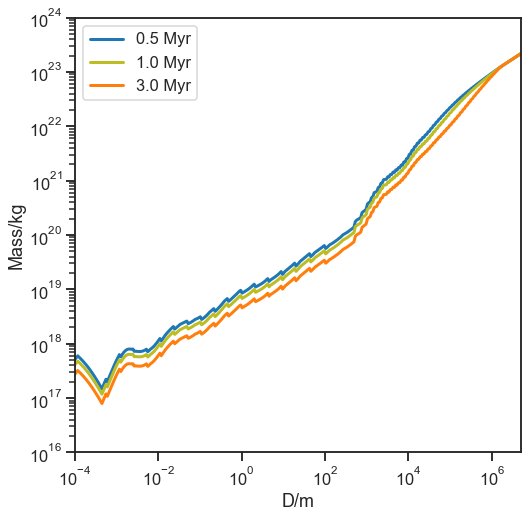

In [78]:

j=0
ll=0
fig, ax = plt.subplots(figsize=(8, 8))

 

for it in range(0,np.size(itime_max_float_arr)):
        
        itime_max_float= itime_max_float_arr[it]
        print(itime_max_float)

  
        f = open(dir1[j]+ "collouts.dat", "r")
        print(f.readline()) # first line of constants

        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
            
            line_split=f.readline() 
    
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            
            timestep=float(timestep_all[3])
            mass=f.readline() # line with mass


            mass_all=re.split(r'\t+', mass.rstrip('\t'))

        line_split=f.readline() 
    


        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[3])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))


        f.close()


        
################################################################################################

        time=float(timestep)*delta_t
        mass_s=np.zeros(nbin)
        
        for i in range(0,nbin-1):
            
            mass_s[i]=float(mass_all_1[i])

        plt.plot(diam_i, mass_s,  color=color_all[it],  label='{:1.1f}'.format(round(time/(1e6*tyear),2))+' Myr')
        ll=ll+1
################################################################################################

        plt.plot([d_eq(time/tyear, mtot/mearth, r, q, ecc), d_eq(time/tyear, mtot/mearth, r, q, ecc)], [1e14,1e25], color=color_all[it], linestyle='-')
    
####

ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('D/m')
plt.ylabel('Mass/kg')
ax.set_ylim((1e16,1e24))
ax.set_xlim((dbl,dmax))
plt.savefig(dir1[j]+"size_vol.pdf")
    
    #######################################
##########

In [79]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


nm=100
nr=1000
# from 0.1 to 100 in log bins

xxx=np.arange(0,nm)

mtot_array= 10.**(-6 + 7.*np.arange(0,nm)/(nm-1))


rbelt =10.**(-1 + 3.*np.arange(0,nr)/(nr-1))
tc=np.empty([nm,nr])
tc_amy=np.empty([nm,nr])

x=rbelt
y=mtot

d_c=1.4e6


qdstar=calc_qdstar(d_c)

diam_i, nbin, norigin, delta_t, ecc, mtot, outputinterval, r, q, rho_s, imax, dr, dbl, dmax= read_inparam(dir1[0])

f_e_I=ecc



jj=500

for i in range(0,nm):
    tc_amy[i]= calc_tc(d_c, mtot_array[i], rbelt*au, q, ecc)
   

z=tc_amy

import matplotlib.colors as colors
import matplotlib.cbook as cbook



Q 1.8333333333333333
ntime	1e8

agrain	0.01	m	grainsize


nbin 331
norigin 176
vrel [9430.44714387 9397.89922608 9365.46364305 9333.14000706 9300.92793175
 9268.82703207 9236.83692432 9204.95722612 9173.18755641 9141.52753543
 9109.97678474 9078.53492723 9047.20158704 9015.97638966 8984.85896184
 8953.84893163 8922.94592837 8892.14958265 8861.45952637 8830.87539269
 8800.39681602 8770.02343206 8739.75487774 8709.59079125 8679.53081205
 8649.57458081 8619.72173947 8589.97193119 8560.32480036 8530.77999262
 8501.33715479 8471.99593496 8442.75598239 8413.61694758 8384.57848222
 8355.64023921 8326.80187265 8298.06303783 8269.42339122 8240.8825905
 8212.4402945  8184.09616325 8155.84985796 8127.70104098 8099.64937586
 8071.69452727 8043.83616108 8016.07394429 7988.40754505 7960.83663265
 7933.36087755 7905.97995131 7878.69352666 7851.50127742 7824.40287856
 7797.39800618 7770.48633748 7743.66755077 7716.9413255  7690.30734219
 7663.76528248 7637.31482912 7610.95566594 7584.68747785 7558.509

vrel [9430.44714387 9397.89922608 9365.46364305 9333.14000706 9300.92793175
 9268.82703207 9236.83692432 9204.95722612 9173.18755641 9141.52753543
 9109.97678474 9078.53492723 9047.20158704 9015.97638966 8984.85896184
 8953.84893163 8922.94592837 8892.14958265 8861.45952637 8830.87539269
 8800.39681602 8770.02343206 8739.75487774 8709.59079125 8679.53081205
 8649.57458081 8619.72173947 8589.97193119 8560.32480036 8530.77999262
 8501.33715479 8471.99593496 8442.75598239 8413.61694758 8384.57848222
 8355.64023921 8326.80187265 8298.06303783 8269.42339122 8240.8825905
 8212.4402945  8184.09616325 8155.84985796 8127.70104098 8099.64937586
 8071.69452727 8043.83616108 8016.07394429 7988.40754505 7960.83663265
 7933.36087755 7905.97995131 7878.69352666 7851.50127742 7824.40287856
 7797.39800618 7770.48633748 7743.66755077 7716.9413255  7690.30734219
 7663.76528248 7637.31482912 7610.95566594 7584.68747785 7558.50995088
 7532.42277211 7506.42562973 7480.51821299 7454.7002122  7428.97131876
 7

vrel [9430.44714387 9397.89922608 9365.46364305 9333.14000706 9300.92793175
 9268.82703207 9236.83692432 9204.95722612 9173.18755641 9141.52753543
 9109.97678474 9078.53492723 9047.20158704 9015.97638966 8984.85896184
 8953.84893163 8922.94592837 8892.14958265 8861.45952637 8830.87539269
 8800.39681602 8770.02343206 8739.75487774 8709.59079125 8679.53081205
 8649.57458081 8619.72173947 8589.97193119 8560.32480036 8530.77999262
 8501.33715479 8471.99593496 8442.75598239 8413.61694758 8384.57848222
 8355.64023921 8326.80187265 8298.06303783 8269.42339122 8240.8825905
 8212.4402945  8184.09616325 8155.84985796 8127.70104098 8099.64937586
 8071.69452727 8043.83616108 8016.07394429 7988.40754505 7960.83663265
 7933.36087755 7905.97995131 7878.69352666 7851.50127742 7824.40287856
 7797.39800618 7770.48633748 7743.66755077 7716.9413255  7690.30734219
 7663.76528248 7637.31482912 7610.95566594 7584.68747785 7558.50995088
 7532.42277211 7506.42562973 7480.51821299 7454.7002122  7428.97131876
 7

vrel [9430.44714387 9397.89922608 9365.46364305 9333.14000706 9300.92793175
 9268.82703207 9236.83692432 9204.95722612 9173.18755641 9141.52753543
 9109.97678474 9078.53492723 9047.20158704 9015.97638966 8984.85896184
 8953.84893163 8922.94592837 8892.14958265 8861.45952637 8830.87539269
 8800.39681602 8770.02343206 8739.75487774 8709.59079125 8679.53081205
 8649.57458081 8619.72173947 8589.97193119 8560.32480036 8530.77999262
 8501.33715479 8471.99593496 8442.75598239 8413.61694758 8384.57848222
 8355.64023921 8326.80187265 8298.06303783 8269.42339122 8240.8825905
 8212.4402945  8184.09616325 8155.84985796 8127.70104098 8099.64937586
 8071.69452727 8043.83616108 8016.07394429 7988.40754505 7960.83663265
 7933.36087755 7905.97995131 7878.69352666 7851.50127742 7824.40287856
 7797.39800618 7770.48633748 7743.66755077 7716.9413255  7690.30734219
 7663.76528248 7637.31482912 7610.95566594 7584.68747785 7558.50995088
 7532.42277211 7506.42562973 7480.51821299 7454.7002122  7428.97131876
 7

  302.36971548  301.32612715  300.28614062  299.24974346  298.21692328] 0.1 mtot 2.71858824273294
vrel [9430.44714387 9397.89922608 9365.46364305 9333.14000706 9300.92793175
 9268.82703207 9236.83692432 9204.95722612 9173.18755641 9141.52753543
 9109.97678474 9078.53492723 9047.20158704 9015.97638966 8984.85896184
 8953.84893163 8922.94592837 8892.14958265 8861.45952637 8830.87539269
 8800.39681602 8770.02343206 8739.75487774 8709.59079125 8679.53081205
 8649.57458081 8619.72173947 8589.97193119 8560.32480036 8530.77999262
 8501.33715479 8471.99593496 8442.75598239 8413.61694758 8384.57848222
 8355.64023921 8326.80187265 8298.06303783 8269.42339122 8240.8825905
 8212.4402945  8184.09616325 8155.84985796 8127.70104098 8099.64937586
 8071.69452727 8043.83616108 8016.07394429 7988.40754505 7960.83663265
 7933.36087755 7905.97995131 7878.69352666 7851.50127742 7824.40287856
 7797.39800618 7770.48633748 7743.66755077 7716.9413255  7690.30734219
 7663.76528248 7637.31482912 7610.95566594 758

In [80]:
import numpy as np
from matplotlib.text import Annotation
from matplotlib.transforms import Affine2D
#from https://stackoverflow.com/questions/18780198/how-to-rotate-matplotlib-annotation-to-match-a-line

class LineAnnotation(Annotation):
    """A sloped annotation to *line* at position *x* with *text*
    Optionally an arrow pointing from the text to the graph at *x* can be drawn.
    Usage
    -----
    fig, ax = subplots()
    x = linspace(0, 2*pi)
    line, = ax.plot(x, sin(x))
    ax.add_artist(LineAnnotation("text", line, 1.5))
    """

    def __init__(
        self, text, line, x, xytext=(0, 5), textcoords="offset points", **kwargs
    ):
        """Annotate the point at *x* of the graph *line* with text *text*.

        By default, the text is displayed with the same rotation as the slope of the
        graph at a relative position *xytext* above it (perpendicularly above).

        An arrow pointing from the text to the annotated point *xy* can
        be added by defining *arrowprops*.

        Parameters
        ----------
        text : str
            The text of the annotation.
        line : Line2D
            Matplotlib line object to annotate
        x : float
            The point *x* to annotate. y is calculated from the points on the line.
        xytext : (float, float), default: (0, 5)
            The position *(x, y)* relative to the point *x* on the *line* to place the
            text at. The coordinate system is determined by *textcoords*.
        **kwargs
            Additional keyword arguments are passed on to `Annotation`.

        See also
        --------
        `Annotation`
        `line_annotate`
        """
        assert textcoords.startswith(
            "offset "
        ), "*textcoords* must be 'offset points' or 'offset pixels'"

        self.line = line
        self.xytext = xytext

        # Determine points of line immediately to the left and right of x
        xs, ys = line.get_data()

        def neighbours(x, xs, ys, try_invert=True):
            inds, = np.where((xs <= x)[:-1] & (xs > x)[1:])
            if len(inds) == 0:
                assert try_invert, "line must cross x"
                return neighbours(x, xs[::-1], ys[::-1], try_invert=False)

            i = inds[0]
            return np.asarray([(xs[i], ys[i]), (xs[i+1], ys[i+1])])
        
        self.neighbours = n1, n2 = neighbours(x, xs, ys)
        
        # Calculate y by interpolating neighbouring points
        y = n1[1] + ((x - n1[0]) * (n2[1] - n1[1]) / (n2[0] - n1[0]))

        kwargs = {
            "horizontalalignment": "center",
            "rotation_mode": "anchor",
            **kwargs,
        }
        super().__init__(text, (x, y), xytext=xytext, textcoords=textcoords, **kwargs)

    def get_rotation(self):
        """Determines angle of the slope of the neighbours in display coordinate system
        """
        transData = self.line.get_transform()
        dx, dy = np.diff(transData.transform(self.neighbours), axis=0).squeeze()
        return np.rad2deg(np.arctan2(dy, dx))

    def update_positions(self, renderer):
        """Updates relative position of annotation text
        Note
        ----
        Called during annotation `draw` call
        """
        xytext = Affine2D().rotate_deg(self.get_rotation()).transform(self.xytext)
        self.set_position(xytext)
        super().update_positions(renderer)


def line_annotate(text, line, x, *args, **kwargs):
    """Add a sloped annotation to *line* at position *x* with *text*

    Optionally an arrow pointing from the text to the graph at *x* can be drawn.

    Usage
    -----
    x = linspace(0, 2*pi)
    line, = ax.plot(x, sin(x))
    line_annotate("sin(x)", line, 1.5)

    See also
    --------
    `LineAnnotation`
    `plt.annotate`
    """
    ax = line.axes
    a = LineAnnotation(text, line, x, *args, **kwargs)
    if "clip_on" in kwargs:
        a.set_clip_path(ax.patch)
    ax.add_artist(a)
    return a

<ipython-input-81-e64b6991b0fa>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolor(x, y, z,


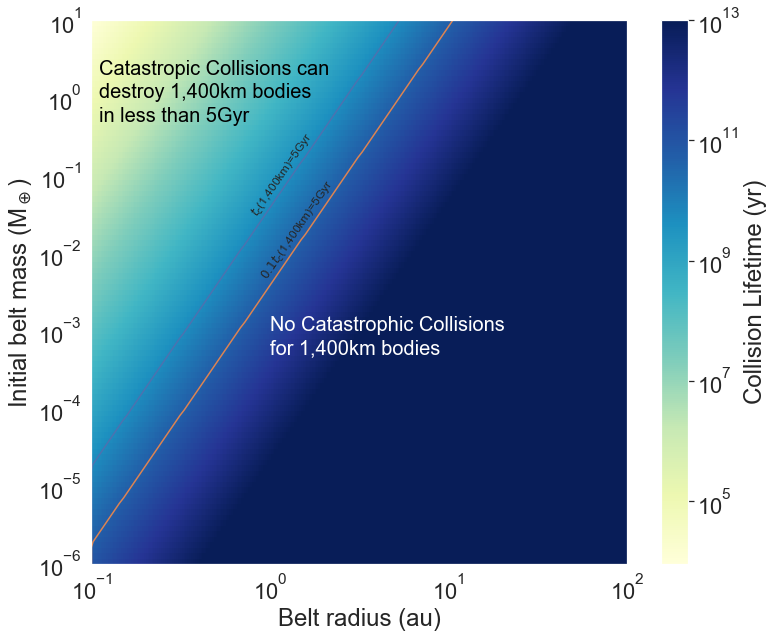

In [81]:

sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(12, 10))


x=rbelt
y=mtot_array
z=tc_amy


pcm = ax.pcolor(x, y, z,
                   norm=colors.LogNorm(vmin=z.min(), vmax=1e13),
                   cmap='YlGnBu')

sns.color_palette("crest", as_cmap=True)

#fig.colorbar(pcm, ax=ax, label='Time (Myr)')

fig.colorbar(pcm, ax=ax, label='Collision Lifetime (yr)')


## over plot a line of tc = 5Gyr

line_5gyr=np.zeros(nm)

for i in range(0,nm):
    xx=np.where(tc_amy[i] > 5e3*1e6)
    if np.size(xx)>0:
        line_5gyr[i]=rbelt[np.min(xx)]


line, =plt.plot( line_5gyr,mtot_array)

line_annotate('$t_c$(1,400km)=5Gyr', line, line_5gyr[70], size=12)



line_5gyr=np.zeros(nm)

for i in range(0,nm):
    xx=np.where(tc_amy[i] > 10*5e3*1e6)
    if np.size(xx)>0:
        line_5gyr[i]=rbelt[np.min(xx)]


line, =plt.plot( line_5gyr,mtot_array)

line_annotate('$0.1t_c$(1,400km)=5Gyr', line, line_5gyr[60], size=12)






#linestyles = ['-', '--', '-.', ':']



         
ax.annotate('Catastropic Collisions can', 
             (0.11, 2), # these are the coordinates to position the label
             color='black', size=20) 

ax.annotate('destroy 1,400km bodies ', 
             (0.11, 1), # these are the coordinates to position the label
             color='black', size=20) 

ax.annotate('in less than 5Gyr', 
             (0.11, 0.5), # these are the coordinates to position the label
             color='black', size=20) 

ax.annotate('No Catastrophic Collisions', 
             (1, 1e-3), # these are the coordinates to position the label
             color='white', size=20) 

ax.annotate('for 1,400km bodies', 
             (1,0.5e-3), # these are the coordinates to position the label
             color='white', size=20) 




ax.set_xscale('log')

ax.set_yscale('log')

plt.xlabel('Belt radius (au)')
plt.ylabel('Initial belt mass (M$_\oplus$)')

#pcm = ax[1].pcolor(x, y, z, cmap='PuBu_r')
#fig.colorbar(pcm, ax=ax[1], extend='max')


plt.savefig("plot_tc_contour.pdf")


In [82]:
plt.close()

